In [43]:
# Clone dir
clone_dir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"

## Clone specific
annClo_dir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/"

## Nuclear clustering 
anno_dir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples"

## clean enrichment, sizes, and dominant clone
aggreg_dir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/clones_change/filt_None__shuffle_True__padj_True__pthresh_0.01_minC_1__bothMinC__0/merge_enrich_and_lineage/"

#btwnClones = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones/"
#enrichment_dir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/enrichment/"
#umap_clones = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/umap_clones_overlay"
#inClones = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/inClones/"
# Cells 
#cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv"
shuffle_f="/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/enrichment/shuffle_stats/shuffle_stats.csv"
params_f = "/data/Mito_Trace/parameters/pipeline/publish/publish_v01.yaml"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/"

#params = {""}


In [2]:
from os.path import join, exists, dirname, basename
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
from glob import glob
sns.set(font_scale=2)


### Setup input directories

In [3]:
cells_meta_f = join(clone_dir, "cells_meta.tsv")
inClones = join(clone_dir, "barcodes/inClones")
btwnClones = join(clone_dir, "barcodes/btwnClones")
enrichment_dir = join(clone_dir, "enrichment")

umap_clones = join(annClo_dir, "umap_clones_overlay")
clone_clust_embed = join(annClo_dir, "clone_clust_embed/tsne_perp30_donperp10/combinedDonors")

In [4]:
if not exists(join(outdir, "suppl")):
    os.mkdir(join(outdir, "suppl"))

if not exists(join(outdir, "suppl/clone_clust_embed")):
    os.mkdir(join(outdir, "suppl/clone_clust_embed"))


In [5]:
cells_meta = pd.read_csv(cells_meta_f, sep="\t", index_col=0)
cells_meta["name"] = cells_meta["donor"].astype(str) + "_" + cells_meta["lineage"].astype(str)

In [6]:
donors = cells_meta["donor"].unique()

In [7]:
clones = cells_meta["name"].unique()

In [44]:
conditions = cells_meta["condition"].unique()
conds_size_cols = {c:f"ncells_in_{c}" for c in conditions}
# columns = ["ID", "donor", "ncells", "hypergeom_sig_clusters_inputOnly", "hypergeom_sig_clusters",
#            "enrichment_fold", "enrichment_sig",
#            "enrichment_log10p", "enrichment_shuffle_sig",
#            "top_vars", "dominant_clone", "dominant_clone_ncells", 
#            "clone_cluster_embed"]

clones_summary_df = pd.DataFrame(index=clones)
clones_summary_df["donor"] = [x.split("_")[0] for x in clones_summary_df.index]
clones_summary_df["lineage"] = [x.split("_")[1] for x in clones_summary_df.index]
#clones_summary_df["ID"] = clones_summary_df.index
clones_summary_df

,donor,lineage
0_0,0,0
0_1,0,1
0_2,0,2
0_3,0,3
0_4,0,4
...,...,...
1_33,1,33
1_34,1,34
1_35,1,35
1_36,1,36


In [48]:
count_cols = all_aggr.columns[all_aggr.columns.str.contains("Cells in Cluster")]
out_cols = {"total_size":"ncells", "p_adj": "fold p_adj", "log2_fold": "log2_fold", "change": "fold_change",
            "dominant_cluster":"dominant_cluster", "dominant_cluster_size":"dominant_cluster_size",
            }

for c in count_cols:
    out_cols[c] = c

for c in out_cols:
    clones_summary_df.loc[all_aggr.index, out_cols[c]] = all_aggr.loc[all_aggr.index, c]
clones_summary_df

,donor,lineage,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster
0_0,0,0,NaN,NaN,419.0,7.557291e-13,-0.476051,regress,3,90.0,79,95,266
0_1,0,1,MPP/CMP/GMP B,0.002267,425.0,9.577929e-20,-0.623482,regress,3,125.0,70,76,289
0_2,0,2,NaN,NaN,399.0,4.902356e-10,0.159693,expand,0,69.0,114,213,73
0_3,0,3,NaN,NaN,357.0,2.117060e-31,1.018686,expand,1,63.0,72,244,41
0_4,0,4,NaN,NaN,307.0,5.842990e-01,-0.279499,no_change,0,45.0,82,113,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_33,1,33,NaN,NaN,57.0,6.656522e-13,3.203872,expand,0,11.0,4,43,2
1_34,1,34,NaN,NaN,46.0,3.372439e-06,1.409876,expand,0,10.0,10,31,1
1_35,1,35,MPP/CMP/GMP C,0.079397,40.0,2.223277e-01,-0.544321,no_change,3,7.0,10,8,16
1_36,1,36,NaN,NaN,41.0,8.969021e-01,-0.762961,no_change,1,7.0,16,11,6


In [49]:
count_cols = in_aggr.columns[in_aggr.columns.str.contains("Cells in Cluster")]
out_cols = {"dominant_cluster":"input_dominant_cluster", "dominant_cluster_size":"input_dominant_cluster_size"}
            #"total_size":"input_total_size"}

for c in out_cols:
    clones_summary_df.loc[in_aggr.index, out_cols[c]] = in_aggr.loc[in_aggr.index, c]
clones_summary_df

,donor,lineage,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size
0_0,0,0,NaN,NaN,419.0,7.557291e-13,-0.476051,regress,3,90.0,79,95,266,3,90.0
0_1,0,1,MPP/CMP/GMP B,0.002267,425.0,9.577929e-20,-0.623482,regress,3,125.0,70,76,289,3,125.0
0_2,0,2,NaN,NaN,399.0,4.902356e-10,0.159693,expand,0,69.0,114,213,73,3,26.0
0_3,0,3,NaN,NaN,357.0,2.117060e-31,1.018686,expand,1,63.0,72,244,41,3,16.0
0_4,0,4,NaN,NaN,307.0,5.842990e-01,-0.279499,no_change,0,45.0,82,113,122,3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_33,1,33,NaN,NaN,57.0,6.656522e-13,3.203872,expand,0,11.0,4,43,2,2,2.0
1_34,1,34,NaN,NaN,46.0,3.372439e-06,1.409876,expand,0,10.0,10,31,1,NaN,NaN
1_35,1,35,MPP/CMP/GMP C,0.079397,40.0,2.223277e-01,-0.544321,no_change,3,7.0,10,8,16,3,7.0
1_36,1,36,NaN,NaN,41.0,8.969021e-01,-0.762961,no_change,1,7.0,16,11,6,12,3.0


## iii. cluster-clone size shift hypergeometric all

In [50]:
shuffle_stats = pd.read_csv(shuffle_f,index_col=0)

In [51]:
cluster_clone_hyper = pd.read_csv(join(hypergeom, "hypergeom.csv"), index_col=0)
cluster_clone_hyper

clones_summary_df.loc[cluster_clone_hyper.index, "hypergeom_sig_clusters"] = cluster_clone_hyper["significant clusters"]
clones_summary_df.loc[cluster_clone_hyper.index, "hypergeom_min_pval"] = cluster_clone_hyper["min_significance"]
#clones_summary_df.loc[cluster_clone_hyper.index, "hyper_size"] = cluster_clone_hyper["size"]

clones_summary_df=clones_summary_df.sort_values(["ncells"], ascending=False)
clones_summary_df["shuffle_sig"] = shuffle_stats["shuffle_sig_max"]
clones_summary_df["-log10(fold p_adj)"] = -np.log10(clones_summary_df["fold p_adj"])
clones_summary_df.to_csv(join(outdir, "clones_summary.csv"))
clones_summary_df

,donor,lineage,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,fold p_adj,log2_fold,fold_change,dominant_cluster,dominant_cluster_size,# Control Cells in Cluster,# Flt3l Cells in Cluster,# Input Cells in Cluster,input_dominant_cluster,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj)
1_0,1,0,MPP/CMP/GMP C,0.059634,579.0,2.448594e-05,0.309328,expand,1,81.0,184,266,138,2,56.0,4;5;7,4.824337e-03,True,4.611083
1_1,1,1,MPP/CMP/GMP C;MPP/CMP/GMP D,0.079397,516.0,5.623765e-16,-1.222392,regress,2,74.0,210,105,205,2,72.0,4;5,3.277061e-02,True,15.249973
1_2,1,2,NaN,NaN,488.0,1.679290e-01,-0.213514,no_change,2,61.0,162,163,167,2,54.0,8,6.799951e-03,False,0.774874
1_3,1,3,NaN,NaN,468.0,4.011071e-07,-1.000000,regress,4,82.0,204,119,147,2,52.0,4,5.231332e-08,True,6.396740
1_4,1,4,NaN,NaN,453.0,9.034752e-04,-0.295324,regress,2,69.0,142,135,190,2,67.0,2;4,4.824337e-03,False,3.044084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_44,0,44,NaN,NaN,28.0,3.754341e-03,0.620444,expand,0,10.0,7,18,1,NaN,NaN,0;10,2.048093e-03,False,2.425466
0_47,0,47,NaN,NaN,17.0,1.211990e-02,1.132343,no_change,10,5.0,3,11,1,NaN,NaN,9;10,9.299686e-04,False,1.916501
0_48,0,48,NaN,NaN,12.0,4.681279e-02,1.257874,no_change,0,5.0,2,8,1,NaN,NaN,NaN,NaN,False,1.329635
0_50,0,50,NaN,NaN,11.0,1.000000e+00,-1.157164,no_change,5,3.0,4,3,2,3,2.0,NaN,NaN,False,-0.000000


In [24]:
cmd = f"cp {params_f} {join(outdir, 'suppl/params.yaml')}"
print(cmd)
!{cmd}

cp /data/Mito_Trace/parameters/pipeline/publish/publish_v01.yaml /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/suppl/params.yaml


In [52]:
#sns.set_context("paper", rc={"font.size":24,"axes.ticklabelssize":24,"axes.labelsize":36})   
sns.set(font_scale = 2)
sns.set_style("white")


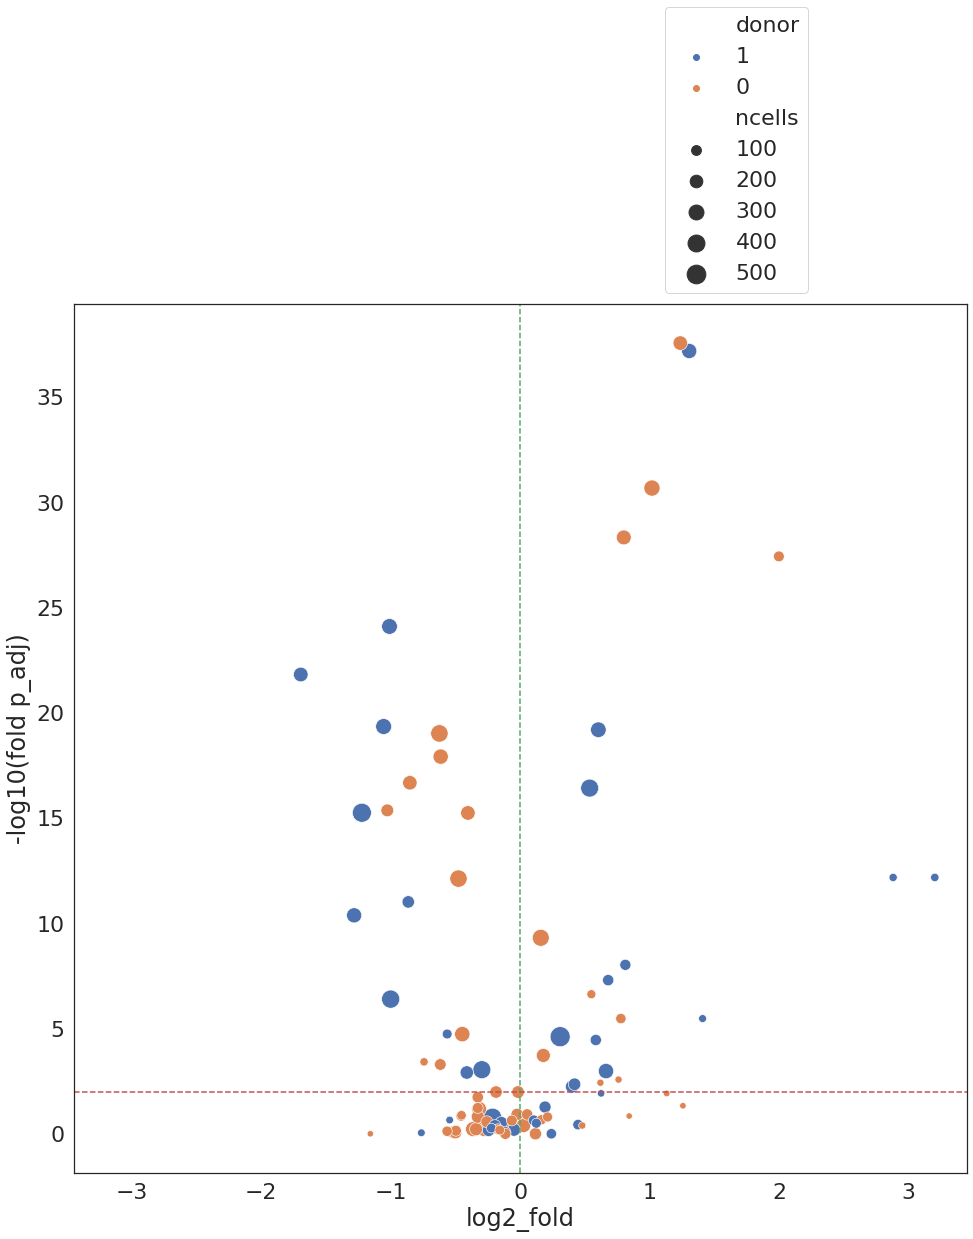

In [53]:
f,ax=plt.subplots(figsize=(16,16))
sns.scatterplot(data=clones_summary_df,hue="donor",x="log2_fold",y="-log10(fold p_adj)", size="ncells", sizes=(40, 400),
                ax=ax)

xposition = [0]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle='--')

plt.axhline(y=-np.log10(0.01), color='r', linestyle='--')
#plt.legend(markerscale=2)
xabs_max = abs(max(ax.get_xlim(), key=abs))
ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)

plt.legend(bbox_to_anchor =(0.65, 1))
plt.savefig(join(outdir, "volcano.png"),dpi=300)


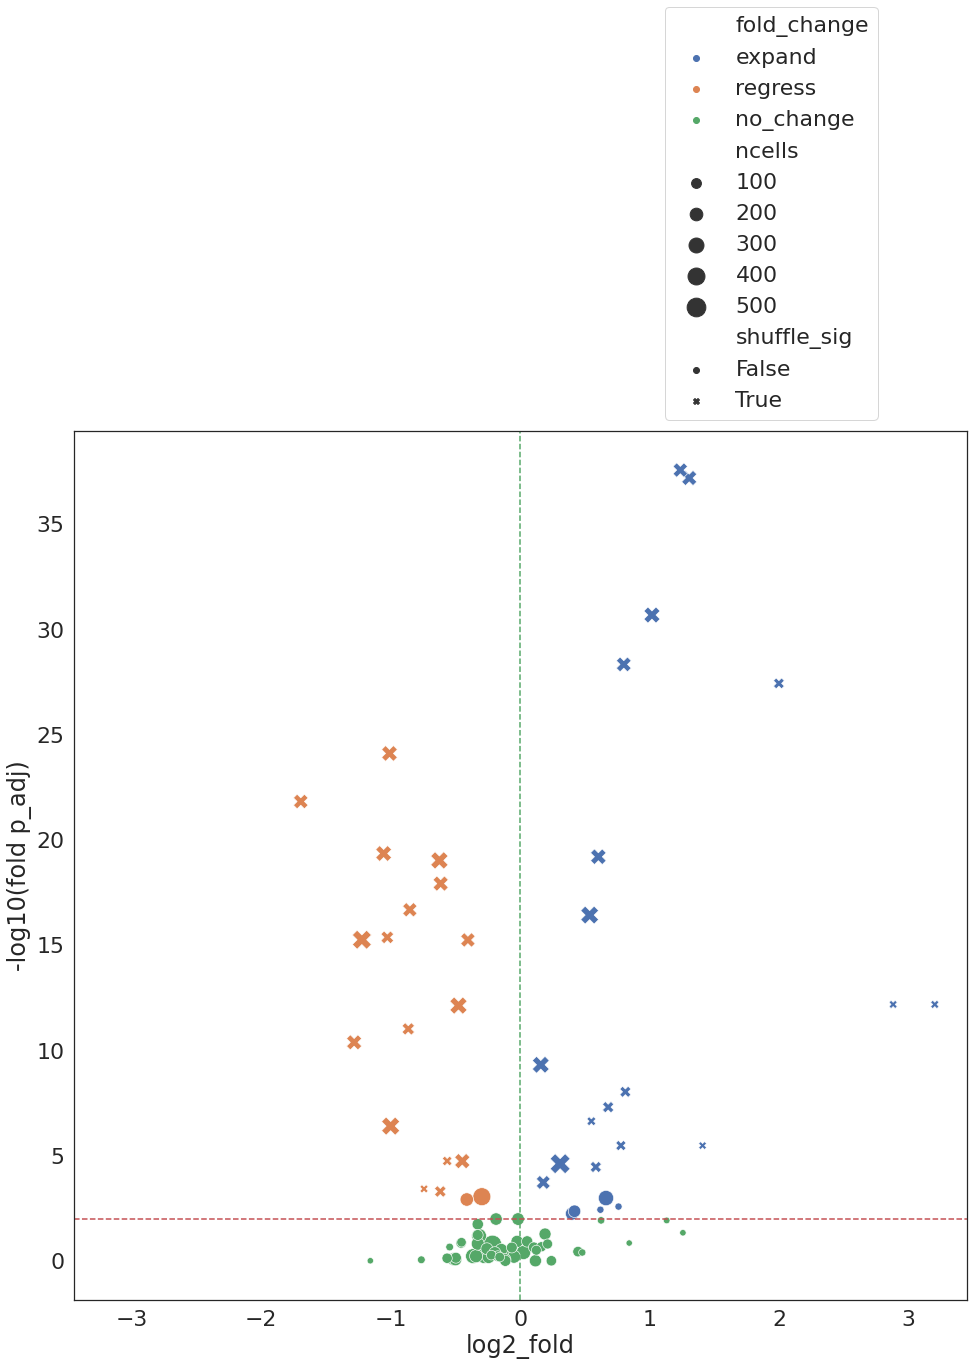

In [40]:
f,ax=plt.subplots(figsize=(16,16))
sns.scatterplot(data=clones_summary_df,hue="fold_change",x="log2_fold",y="-log10(fold p_adj)", 
                size="ncells", sizes=(40, 400), style="shuffle_sig",
                ax=ax)

xposition = [0]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle='--')

plt.axhline(y=-np.log10(0.01), color='r', linestyle='--')
#plt.legend(markerscale=2)
xabs_max = abs(max(ax.get_xlim(), key=abs))
ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
plt.legend(bbox_to_anchor =(0.65, 1))
plt.savefig(join(outdir, "volcano_with_shuffle_foldChange.png"),dpi=300)


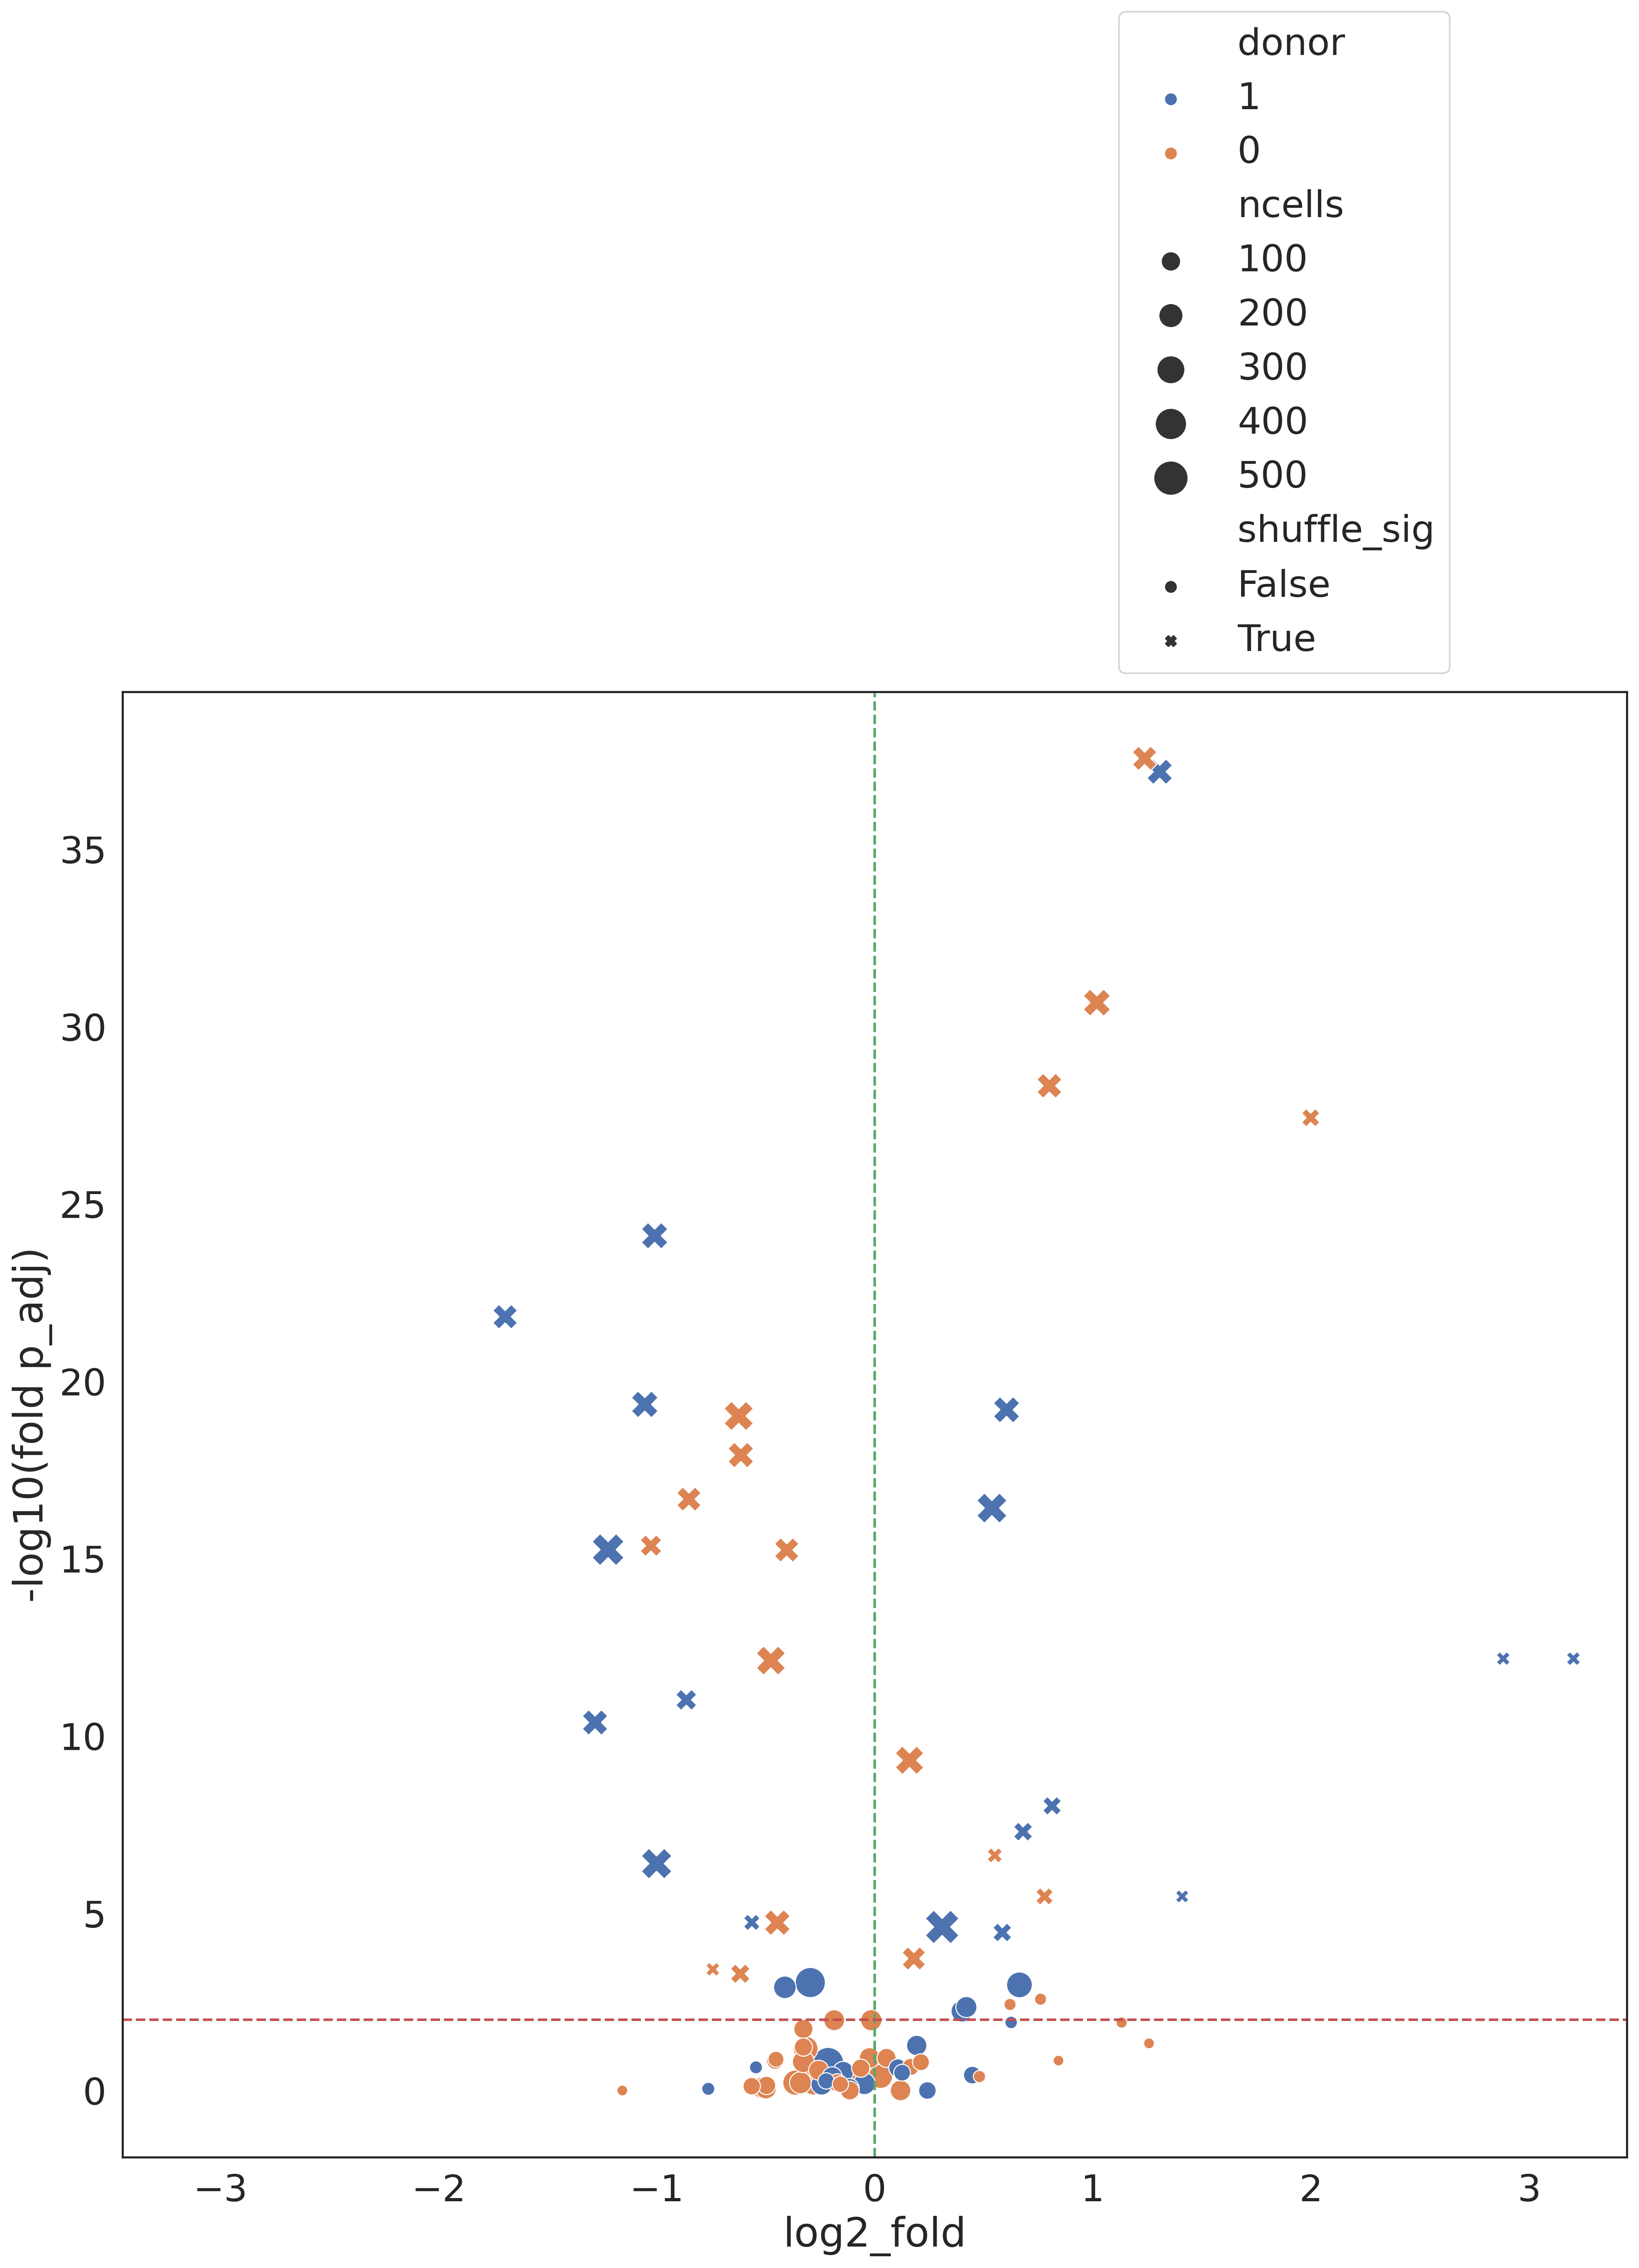

In [41]:
f,ax=plt.subplots(figsize=(16,16),dpi=300)
sns.scatterplot(data=clones_summary_df,hue="donor",x="log2_fold",y="-log10(fold p_adj)", 
                size="ncells", sizes=(40, 400), style="shuffle_sig",
                ax=ax)

xposition = [0]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle='--')

plt.axhline(y=-np.log10(0.01), color='r', linestyle='--')

xabs_max = abs(max(ax.get_xlim(), key=abs))
ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
#plt.legend(markerscale=2)
plt.legend(bbox_to_anchor =(0.65, 1))

plt.savefig(join(outdir, "volcano_with_shuffle.png"), dpi=300)


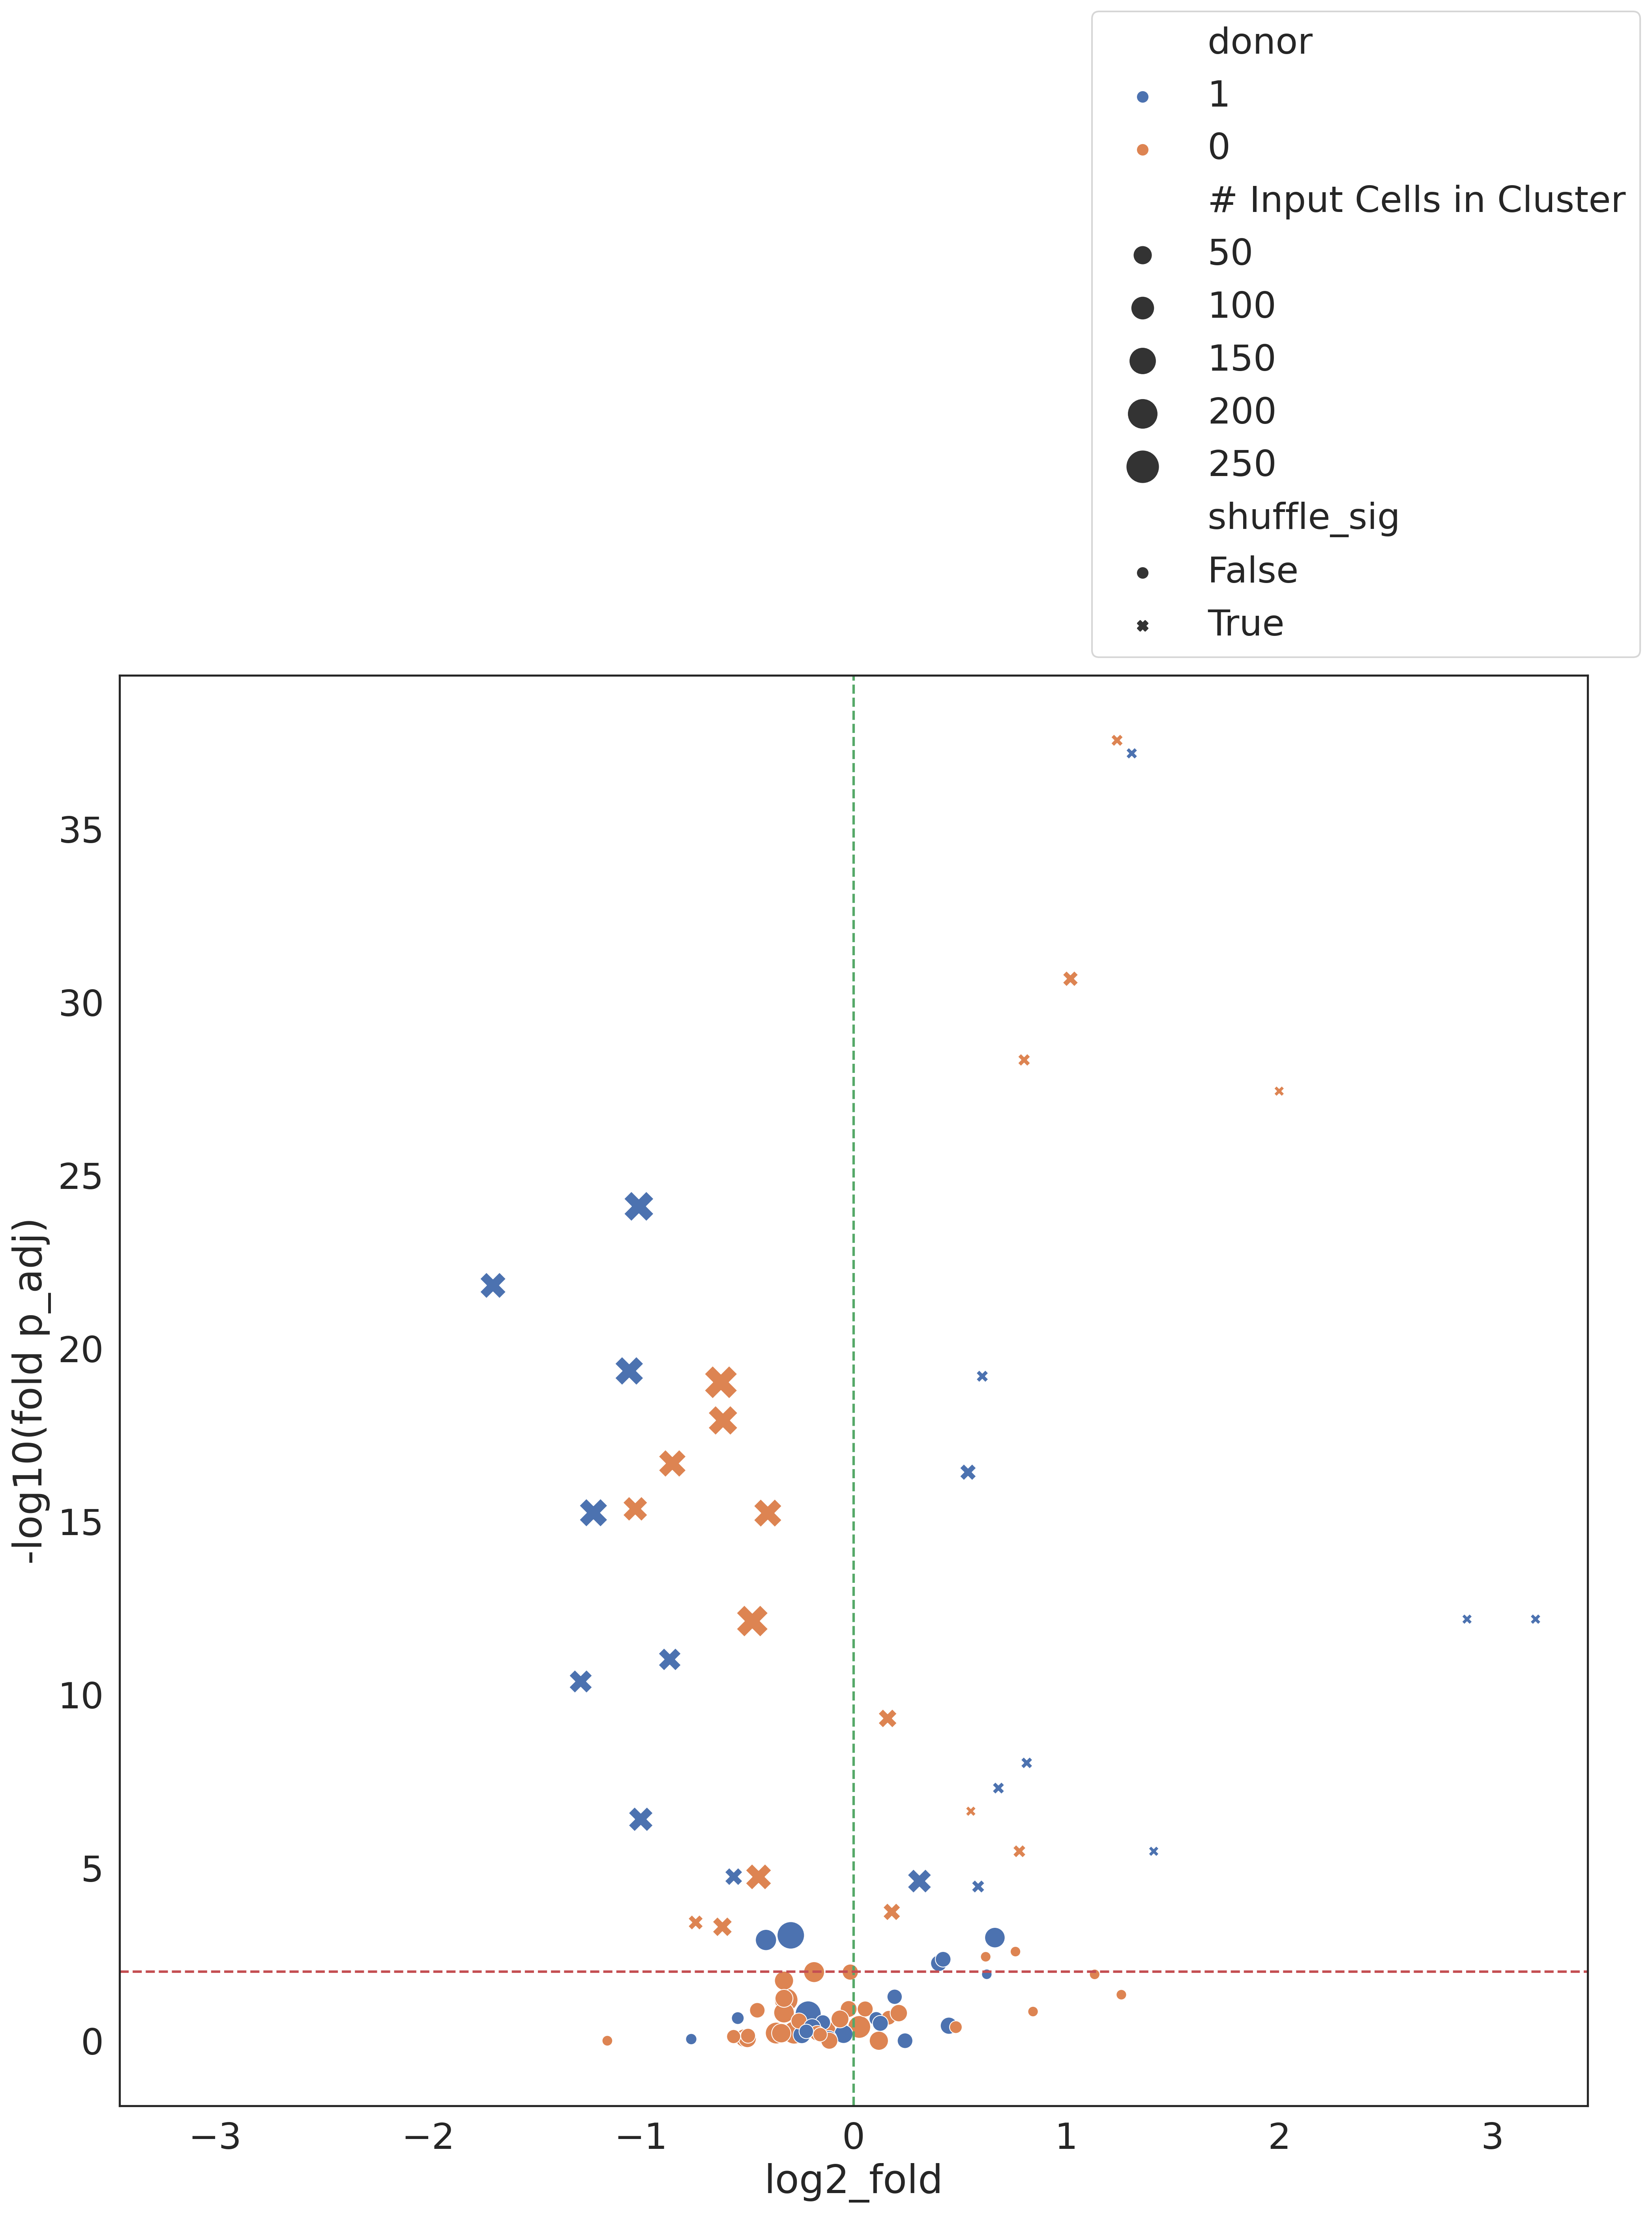

In [42]:
if "# Input Cells in Cluster" in clones_summary_df.columns:
    f,ax=plt.subplots(figsize=(16,16),dpi=300)
    sns.scatterplot(data=clones_summary_df,hue="donor",x="log2_fold",y="-log10(fold p_adj)", 
                    size="# Input Cells in Cluster", sizes=(40, 400), style="shuffle_sig",
                    ax=ax)

    xposition = [0]
    for xc in xposition:
        plt.axvline(x=xc, color='g', linestyle='--')

    plt.axhline(y=-np.log10(0.01), color='r', linestyle='--')

    xabs_max = abs(max(ax.get_xlim(), key=abs))
    ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
    #plt.legend(markerscale=2)
    plt.legend(bbox_to_anchor =(0.65, 1))

    plt.savefig(join(outdir, "volcano_with_shuffle_input.png"),dpi=300)

In [31]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/'